# 1. DEFINE PROJECT
Given the importance of customer churn, telecom companies are working hard to survive in this competitive industry. Therefore, finding the main factor that increases customer churn is important to take the initiative to bring down this churn. I collected a dataset on Kaggle including 41 attributes and 7043 instances, each instance shows the record of a customer and their status (stayed, churned, joined) with the company. In this project, I attempted to achieve two main objectives: 

1/ Identify and analyze most relevant attributes that cause customer churn \
2/ Predict a potential churn and make recommendations to prevent it

In this project, I will develop different models including logistic regression, Naive Bayes, decision trees and Random Forests to predict customer churn. By comparing the accuracy of the prediction result, I can determine which model is the best.

Import neccessary packages in the project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_val_predict, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import numpy as np
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sm

# 2. DESCRIBE DATA

Import the dataset

In [2]:
telecom_customer_churn = pd.read_csv('telecom_customer_churn.csv')
churn_df = telecom_customer_churn.copy(deep=True)
print(churn_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

Check unique value of each variable to see if their types are reasonable. It is determine the quality of data and see if we need to change data type or not.

In [3]:
def data_type_check(df):
    data_check = pd.DataFrame({'Unique values':"", 'Dtype':df.dtypes})
    for index in data_check.index:
        data_check.loc[index,'Unique values']=df[index].unique()
    return data_check

In [4]:
data_type_check(churn_df)

,Unique values,Dtype
Customer ID,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...",object
Gender,"[Female, Male]",object
Age,"[37, 46, 50, 78, 75, 23, 67, 52, 68, 43, 47, 2...",int64
Married,"[Yes, No]",object
Number of Dependents,"[0, 3, 1, 2, 4, 6, 5, 9, 7, 8]",int64
City,"[Frazier Park, Glendale, Costa Mesa, Martinez,...",object
Zip Code,"[93225, 91206, 92627, 94553, 93010, 95345, 934...",int64
Latitude,"[34.827662, 34.162515, 33.645672, 38.014457, 3...",float64
Longitude,"[-118.999073, -118.203869, -117.922613, -122.1...",float64
Number of Referrals,"[2, 0, 1, 3, 8, 9, 10, 5, 4, 7, 6, 11]",int64


Review the statistical of numeric columns of the dataset

In [5]:
churn_df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


Check missing values, duplicated values

In [6]:
df_churn_info = pd.DataFrame({'No unique values': churn_df.nunique(),
                         'Missing Value': churn_df.isna().sum(),
                         'Duplicated': churn_df.duplicated().sum(),
                         'Dtype': churn_df.dtypes})
df_churn_info

,No unique values,Missing Value,Duplicated,Dtype
Customer ID,7043,0,0,object
Gender,2,0,0,object
Age,62,0,0,int64
Married,2,0,0,object
Number of Dependents,10,0,0,int64
City,1106,0,0,object
Zip Code,1626,0,0,int64
Latitude,1626,0,0,float64
Longitude,1625,0,0,float64
Number of Referrals,12,0,0,int64


In [7]:
# Identify column with missing values
col_has_na = list(df_churn_info['Missing Value'][df_churn_info['Missing Value']>0].index)
col_has_na

['Avg Monthly Long Distance Charges',
 'Multiple Lines',
 'Internet Type',
 'Avg Monthly GB Download',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Churn Category',
 'Churn Reason']

<AxesSubplot:>

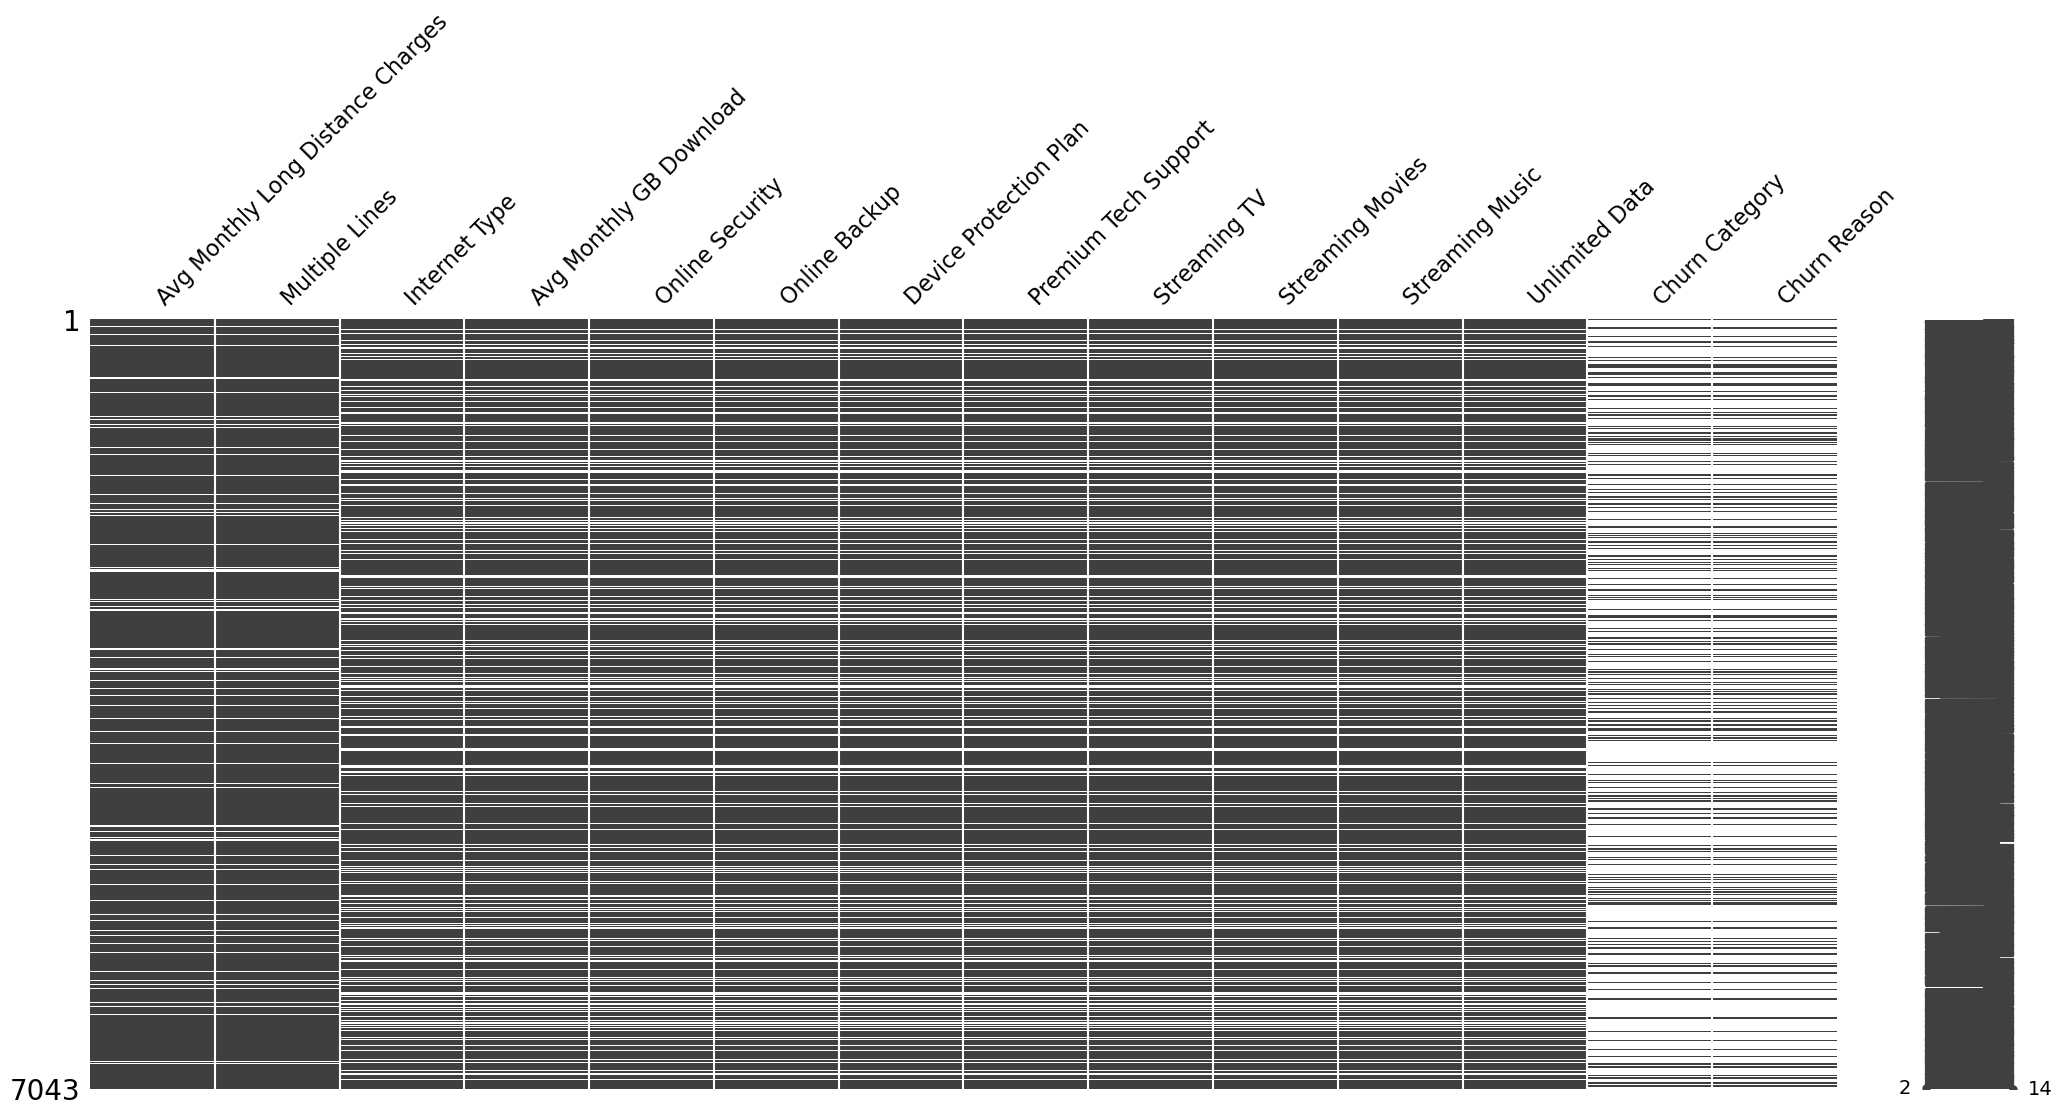

In [8]:
#!pip install missingno
# Import package to visualize the missing values
import missingno as msno
msno.matrix(churn_df[col_has_na])

Analysis:
* Data has 7043 rows and 38 columns with different data types including object, int64, float64.
* All object type columns are categorical, in which several variables are binary.
* Data types fit with their associated value, so we don't need to make a data type adjustment.
* There are several missing values in different columns. Looking at the missing visualization chart, we can see that they occur on same row, which make me believe that they are missing data entry values. The column "Churn Category" and "Churn reason" are not used and will be removed. Then I will remove rows with missing values in other columns in next step.

I will then remove columns that I don't use and rows with missing values before further visualization and analysis

In [9]:
# drop unused columns
churn_df_pre_process = churn_df.drop(['Customer ID','Churn Category','Churn Reason','City','Zip Code','Latitude','Longitude'],axis=1)
churn_df_pre_process.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

Regarding missing values, I can make assumption to fill data with mean, median, or most frequent values. However, after checking row with missing values, I believe believe data entry was missed and hence decided to remove them.

In [10]:
col_has_na_pre_process = [col for col in churn_df_pre_process.columns if churn_df_pre_process[col].isna().sum()>0]
col_has_na_pre_process

['Avg Monthly Long Distance Charges',
 'Multiple Lines',
 'Internet Type',
 'Avg Monthly GB Download',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data']

In [11]:
# Remove all row that has na values. At the stage, churn_final_df is the final datasets we can use.
churn_final_df = churn_df_pre_process.dropna(axis=0,how='any',subset=col_has_na_pre_process)
print(churn_final_df.shape)
churn_final_df.isna().sum()

(4835, 31)


Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

Visualize object variables

In [12]:
object_list = [x for x in churn_final_df.columns if (churn_final_df[x].dtypes == 'object')]
print(f'Number of columns with object type: {len(object_list)}')
object_list

Number of columns with object type: 19


['Gender',
 'Married',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Customer Status']

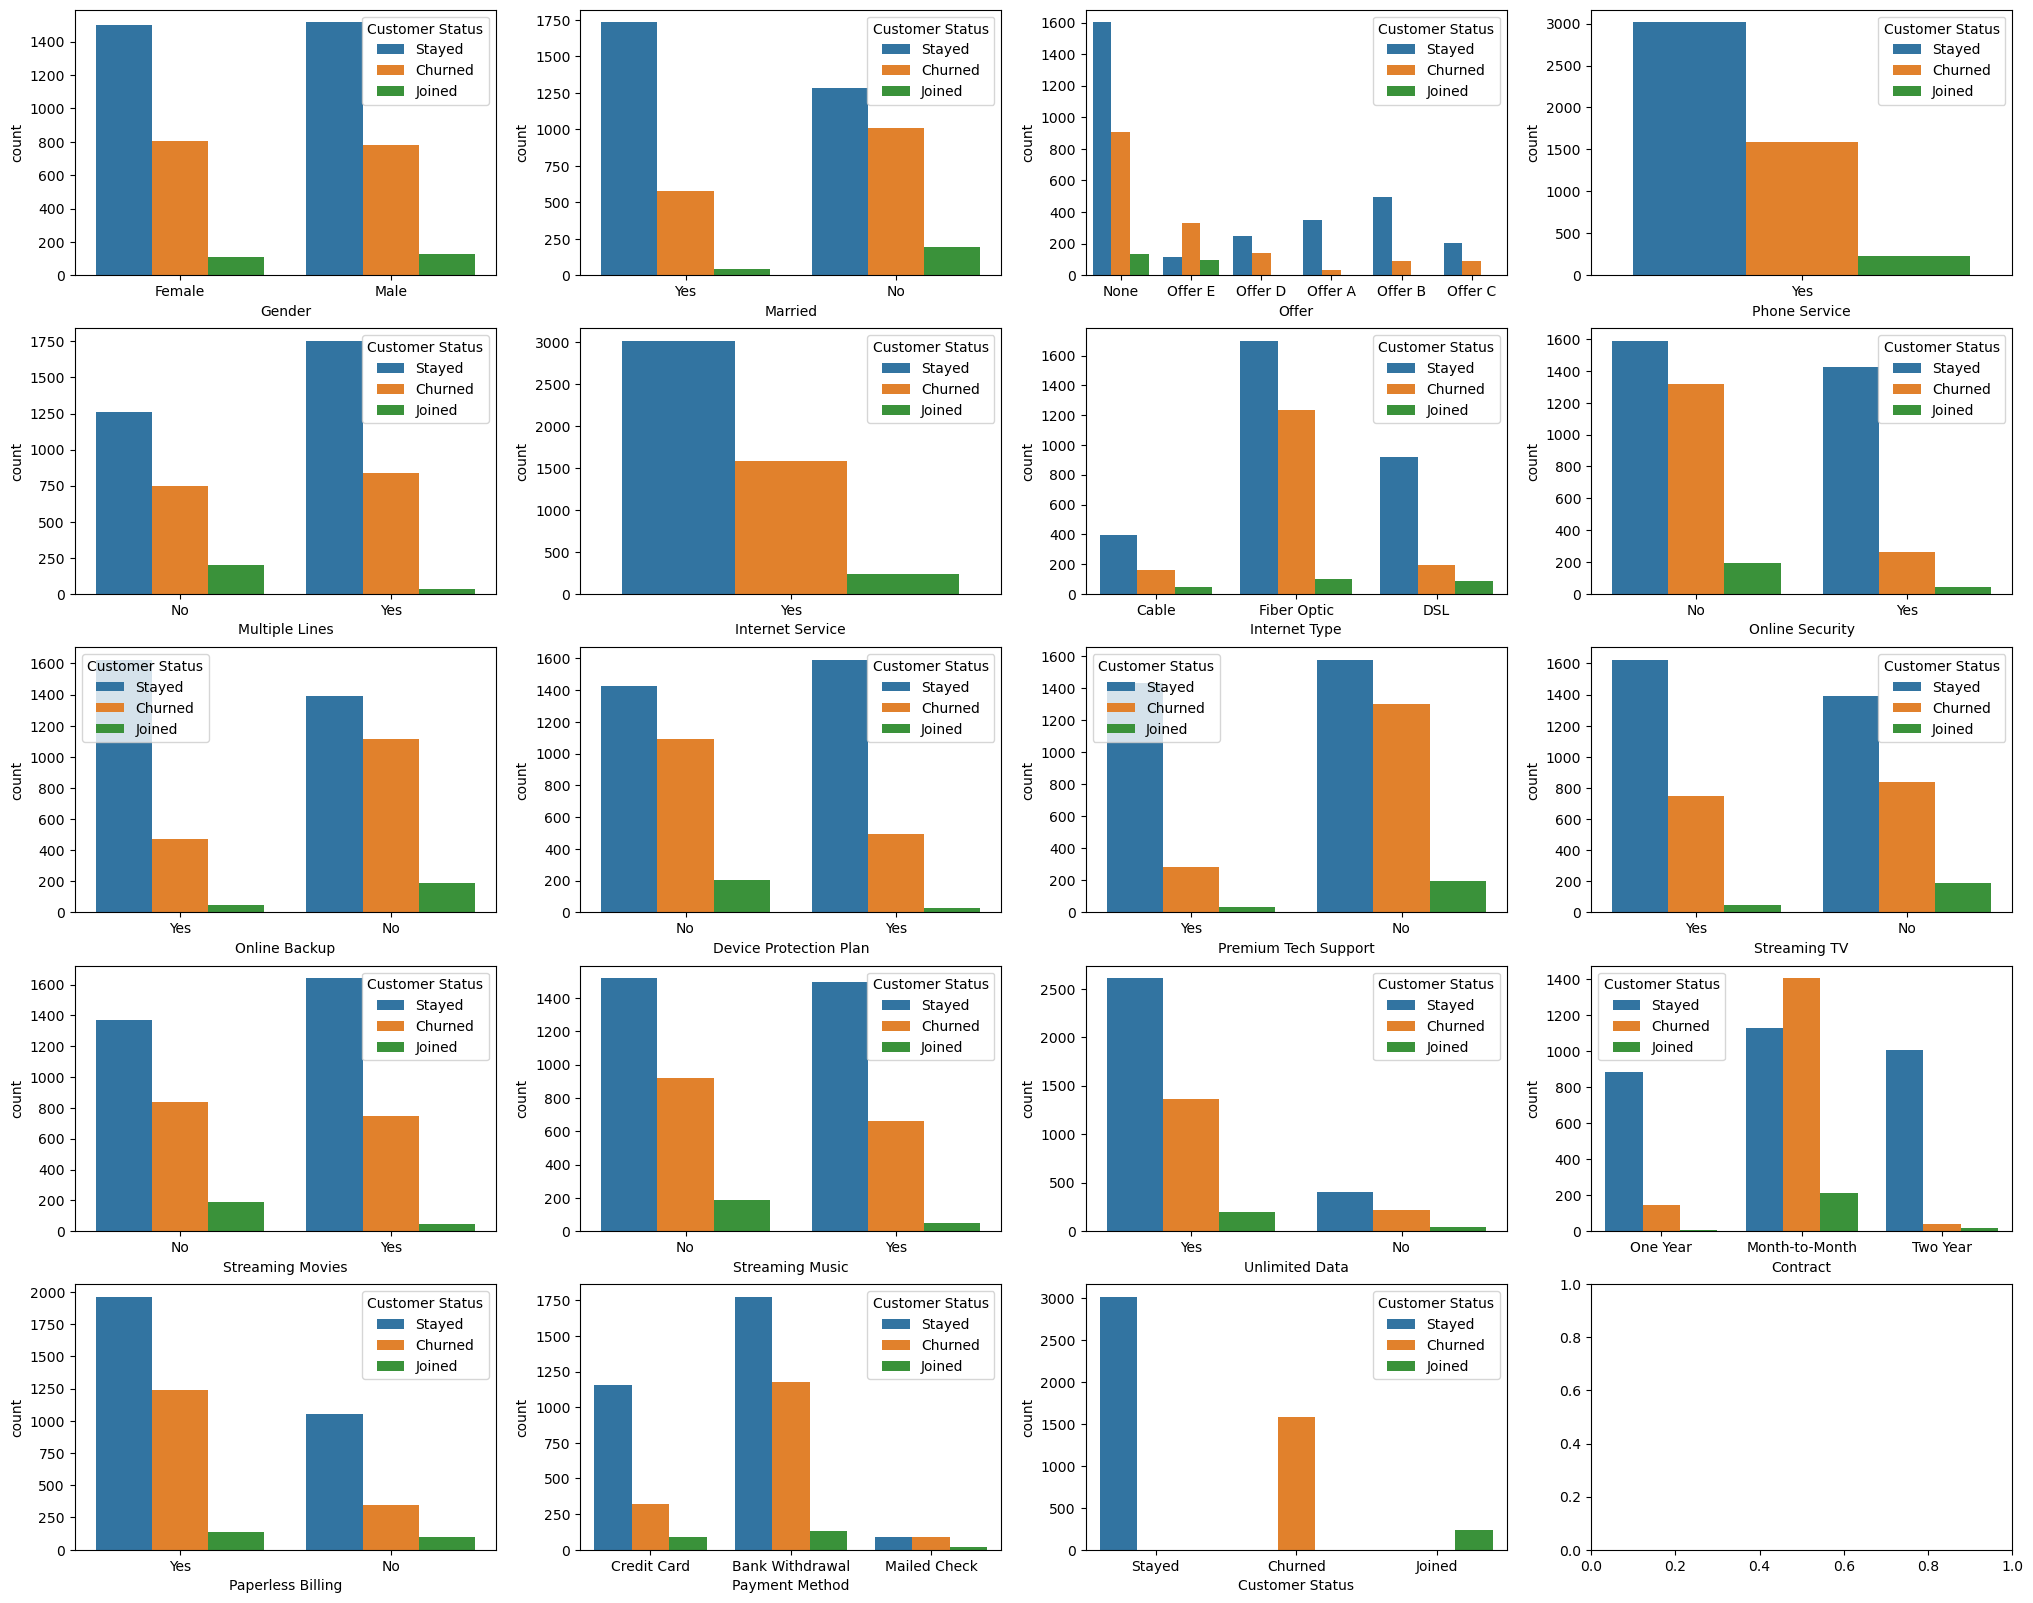

In [13]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(25,20))

for var, subplot in zip (object_list, ax.flatten()):
    sns.countplot(data = churn_final_df, x = var, ax=subplot, hue='Customer Status')

Visualize numeric variables

In [14]:
numeric_list = [x for x in churn_final_df.columns if ((churn_final_df[x].dtypes == 'float64')|(churn_final_df[x].dtypes == 'int64'))]
print(f'Number of columns with object type: {len(numeric_list)}')
numeric_list

Number of columns with object type: 12


['Age',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue']

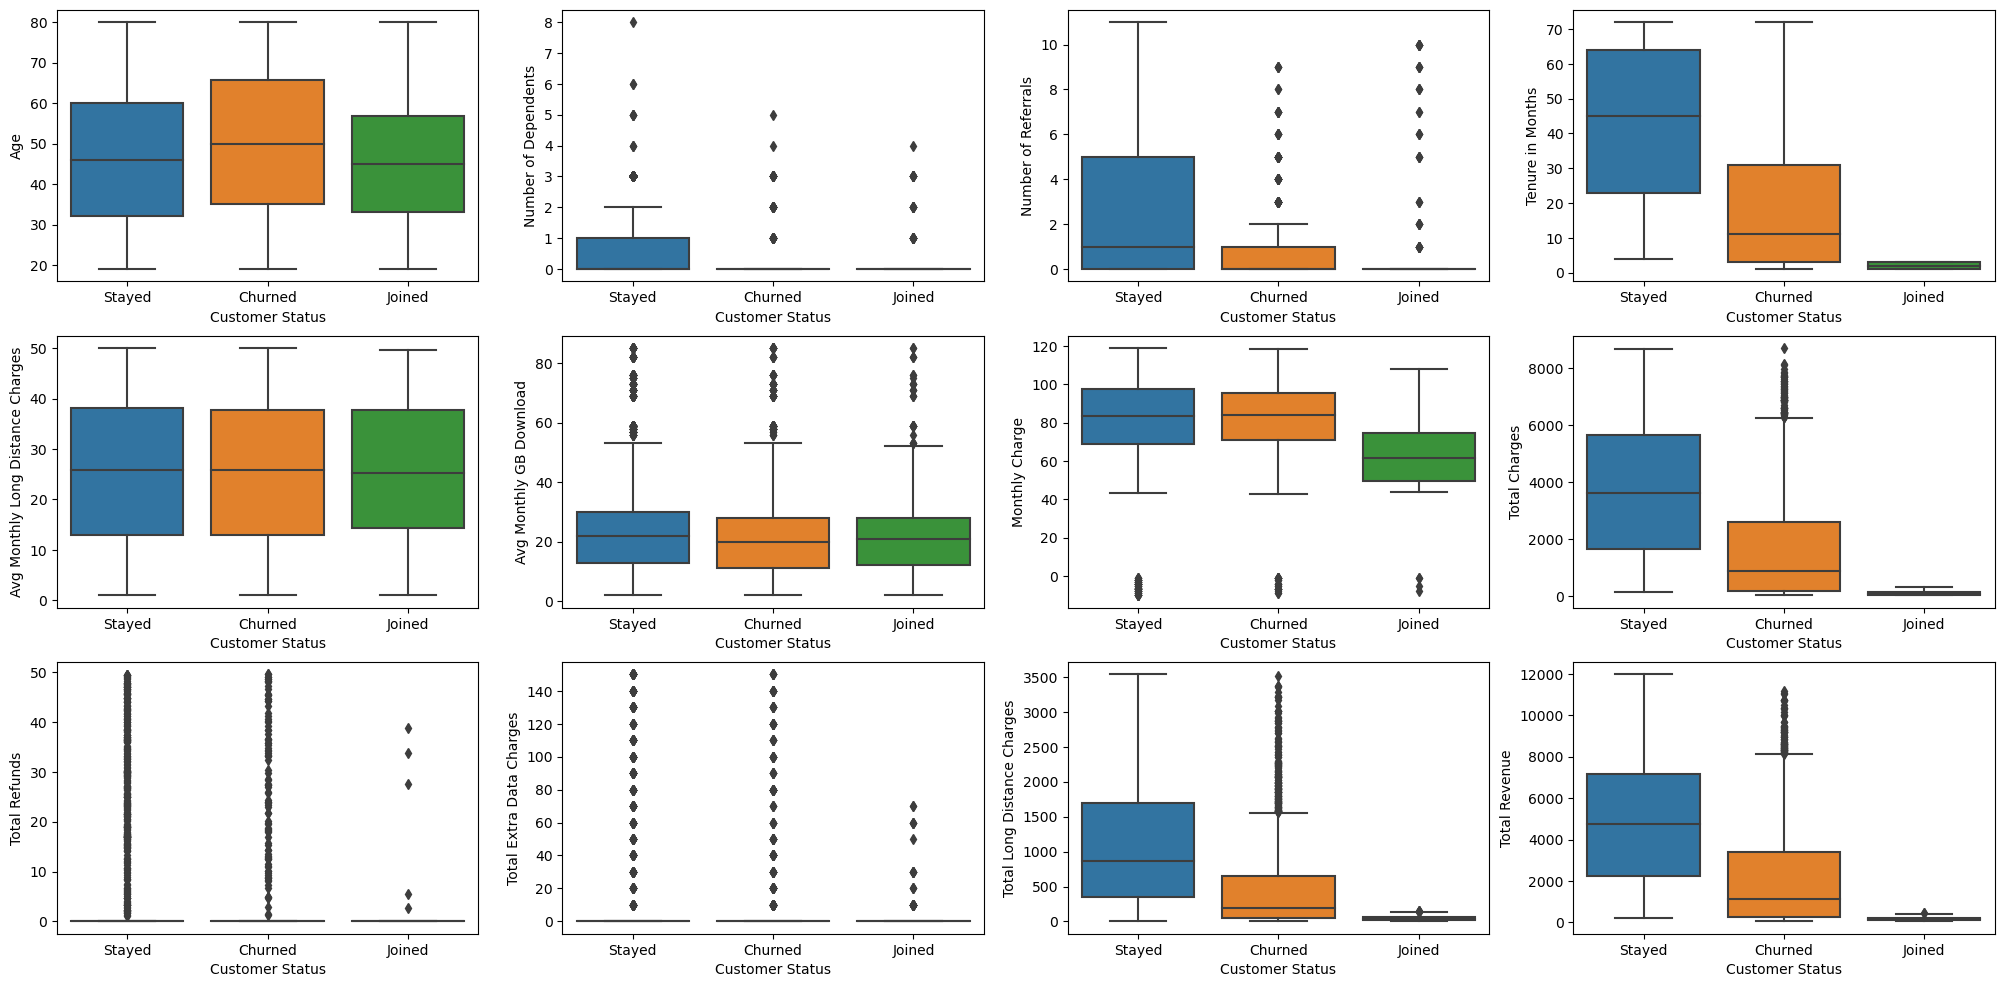

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(25,12))

for var, subplot in zip (numeric_list, ax.flatten()):
    sns.boxplot(data = churn_final_df, x = 'Customer Status', y = var, ax=subplot)

Visualize correlation map of numeric variables in the data set

<AxesSubplot:>

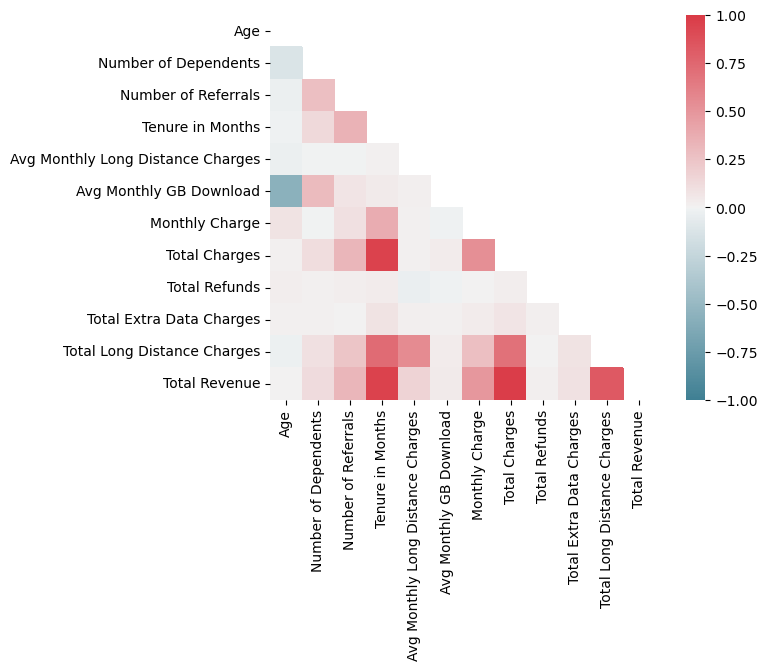

In [16]:
corr = churn_final_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Analysis:
* By looking at visualization of the object variables, I can see some factors that highly impact to customer churn status. For example: a/ customers using Internet type as Fiber Optic tend to churn more than other types; b/ customers who do not use "Online security", "Online backup", "Device Protection Plan", or "Premium Technical support" likely churn more.
* By reviewing the visulization of he numerice variables, I can identify attributes that have outliers such as "Number of dependents", "Avg Monthly GB download", "Monthly charge"
* Some variables are highly correlated with each others. They are "Total Revenue" and "Tenure in Months" or "Total charges" or "Monthly Charge" or "Total Long DIstance Charges". They are reasonable since cusotmers pay more for each service will bring more revenue to the company.

# 3. PRE-PROCESSING DATA & DEVELOP MODEL

In this project, I will different machine learning models to classify the target variable. It is data mining process that I need to take to decide what model is the best for the business purpose. Each model has unique requirement of data and hence I have to perform data processing differently for each model, which I will show in following parts.

To avoid over fitting, I will apply a combination of different techniques. I will explain in detail the pro and cons for each techinque in each part. The following bullet points show the summary
* Stratified 10-fold cross validation sampling method for all models
* For logistic regression: run backward or forward to select the most important variables
* For Naive Bayes: use different bins
* For decision tree: use different criteria or depth, select proper features before running model
* For Random Forest: select proper features before running model

Before moving further, we need to remove outlier, in which the upper limit cut-off is 1.5*IQR above the percentile 75% and lower cut-off is 1.5*IQR below the percentile 25%.

In [17]:
def drop_outlier(df,col):
  Q1 = np.percentile(df[col], 25, interpolation = 'midpoint') 
  Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  print("Old Shape: ", df.shape)
  upper_limit = Q3+1.5*IQR # percentile75 + 1.5 * IQR
  lower_limit = Q1-1.5*IQR
  newdf=df[(df[col] < upper_limit) & (df[col] > lower_limit)] 
  print("New Shape : ", newdf.shape)
  return newdf

In [18]:
churn_final_clean_df = drop_outlier(churn_final_df,'Avg Monthly GB Download')
churn_final_clean_df = drop_outlier(churn_final_clean_df,'Monthly Charge')

Old Shape:  (4835, 31)
New Shape :  (4268, 31)
Old Shape:  (4268, 31)
New Shape :  (4194, 31)


Remove data with Customer Status as "Joined" because they are new customers. Our goal is to predict if old customers will churn or not. After this step, churn_final_clean_df will be our latest data set for further steps.

In [19]:
churn_final_clean_df = churn_final_clean_df[churn_final_clean_df['Customer Status']!="Joined"]
churn_final_clean_df['Customer Status'].value_counts()

Stayed     2554
Churned    1437
Name: Customer Status, dtype: int64

Explore more the mean of each classification to have better sense about each numeric attribute

In [20]:
churn_final_clean_df.groupby('Customer Status').mean()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Customer Status,,,,,,,,,,,,
Churned,52.331942,0.081420,0.545581,19.102296,25.368212,19.577592,82.605324,1735.592971,1.673994,7.181628,501.066729,2242.167335
Stayed,49.523493,0.435787,2.638215,42.996868,25.655180,21.195771,82.934182,3748.795008,2.435074,9.686766,1101.611030,4857.657729


# 3.1. LOGISTIC REGRESSION

# 3.1.1. PRE-PROCESSING DATA

As mentioned above, we need to prepare data for each model differently. First we copy data to use for Logistic Regression specifically then define independent variable X and target variable Y.

In [21]:
churn_df_log = churn_final_clean_df.copy(deep=True)
X_churn_df_log = churn_df_log.drop('Customer Status',axis=1)
Y_churn_df_log = churn_df_log['Customer Status']

In [22]:
# check data to have a general idea about type of values
data_type_check(X_churn_df_log)

,Unique values,Dtype
Gender,"[Female, Male]",object
Age,"[37, 50, 78, 75, 67, 52, 68, 43, 58, 32, 79, 2...",int64
Married,"[Yes, No]",object
Number of Dependents,"[0, 1, 2, 3, 6, 4, 5]",int64
Number of Referrals,"[2, 0, 1, 3, 8, 9, 4, 7, 5, 10, 6]",int64
Tenure in Months,"[9, 4, 13, 3, 71, 63, 7, 65, 5, 72, 45, 23, 37...",int64
Offer,"[None, Offer E, Offer D, Offer A, Offer B, Off...",object
Phone Service,[Yes],object
Avg Monthly Long Distance Charges,"[42.39, 33.65, 27.82, 7.38, 9.96, 12.96, 10.53...",float64
Multiple Lines,"[No, Yes]",object


To run Logistic Regression, we need to change all categorical variables to dummy variables before running the model

In [23]:
X_churn_df_log_dummy_col = [x for x in X_churn_df_log.columns if X_churn_df_log[x].dtypes=='object']
print(X_churn_df_log_dummy_col)

['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']


In [24]:
X_churn_df_log_dummy = pd.get_dummies(X_churn_df_log,columns=X_churn_df_log_dummy_col)
print(X_churn_df_log_dummy.columns)

Index(['Age', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Offer_None',
       'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D',
       'Offer_Offer E', 'Phone Service_Yes', 'Multiple Lines_No',
       'Multiple Lines_Yes', 'Internet Service_Yes', 'Internet Type_Cable',
       'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Online Security_No',
       'Online Security_Yes', 'Online Backup_No', 'Online Backup_Yes',
       'Device Protection Plan_No', 'Device Protection Plan_Yes',
       'Premium Tech Support_No', 'Premium Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_Yes', 'Streaming Music_No', 

In [25]:
# change values of target variables to numeric
Y_churn_df_log = Y_churn_df_log.apply(lambda x:1 if x=='Churned' else 0)
Y_churn_df_log.value_counts()

0    2554
1    1437
Name: Customer Status, dtype: int64

# 3.1.2. Develop Logistic Regression

In [26]:
# create stratified 10-fold cross validation sampling method
stratified_kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [27]:
# define the model
log_reg = LogisticRegression(solver="liblinear")

Develop function to run model and return confustion matrix and accuracy values. This function will be applied to different model, which saves a lot of time when we re-rerun other model later.

In [28]:
# Create a evaluation table to summarize all needed values of the metrics
evaluation_df = pd.DataFrame(columns=['model_name','precision','recall','f1-score','support','accuracy','auc'])
evaluation_df

,model_name,precision,recall,f1-score,support,accuracy,auc


In [29]:
def ML_model(model_name,_model,_x,_y,_cv):
    accuracy = cross_val_score(_model, _x, _y, cv=_cv)
    y_pred = cross_val_predict(_model, _x, _y, cv=_cv)
    
    # Create classiciation report and build database for values in the report including precision, recall, f1-score, support
    report = classification_report(_y, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    
    # Calculate AUC of model
    auc = metrics.roc_auc_score(_y, y_pred)
    
    # Add values into the evaluation table
    evaluation_df.loc[len(evaluation_df),:] = [model_name,df_report.iloc[1,0],df_report.iloc[1,1],\
                                               df_report.iloc[1,2],df_report.iloc[1,3], accuracy.mean(), auc]

In [30]:
# Run model and present the result.
ML_model('log_reg',log_reg,X_churn_df_log_dummy,Y_churn_df_log,stratified_kf)
evaluation_df

,model_name,precision,recall,f1-score,support,accuracy,auc
0,log_reg,0.747119,0.766875,0.756868,1437.0,0.822598,0.810415


I ran the model for all variables in the data set above. Now I will run logistic regression backward elimination so that model will only keep most important features. Then we will use new variables to see if we can improve performance of the model.

In [31]:
# Install mlxtend package
#!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Define the backward elimination with log_reg as model, k_features as number of remaining features we want to keep,
# scoring as mean squared error metric which the model uses to determine which variable to be dropped.
sfs1 = sfs(log_reg, k_features=10, forward=False, scoring='neg_mean_squared_error')

In [32]:
# Fit the model
sfs1 = sfs1.fit(X_churn_df_log_dummy,Y_churn_df_log)

In [33]:
# Top 10 features that are kept
feat_names = list(sfs1.k_feature_names_)
feat_names

['Age',
 'Number of Referrals',
 'Tenure in Months',
 'Total Charges',
 'Married_No',
 'Offer_Offer D',
 'Online Security_Yes',
 'Premium Tech Support_No',
 'Contract_Month-to-Month',
 'Payment Method_Credit Card']

I will re-run the model by only using above 10 features and evaluate performance of the model

In [34]:
X_churn_df_log_dummy_top10 = X_churn_df_log_dummy[feat_names]
ML_model('log_reg_top10', log_reg, X_churn_df_log_dummy_top10, Y_churn_df_log, stratified_kf)
evaluation_df

,model_name,precision,recall,f1-score,support,accuracy,auc
0,log_reg,0.747119,0.766875,0.756868,1437.0,0.822598,0.810415
1,log_reg_top10,0.741089,0.766875,0.753762,1437.0,0.819594,0.808066


The overall performance of the model is the same on all of metrics values when we reduce the number of features. It can indicate that these variables are highly important. We will verify them by running other models like Decision Tree or Random Forest. Now let's implement the model and interpret the meaning

In [35]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_churn_df_log,X_churn_df_log_dummy_top10)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.402100
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Customer Status   No. Observations:                 3991
Model:                          Logit   Df Residuals:                     3981
Method:                           MLE   Df Model:                            9
Date:                Fri, 23 Dec 2022   Pseudo R-squ.:                  0.3847
Time:                        18:53:47   Log-Likelihood:                -1604.8
converged:                       True   LL-Null:                       -2607.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                            0.0125      0.002      5.668      0.000      

Interpretation of results: We predict if a customer will churn (label as 1) or not (label as 0), meaning if the coef of the variable is positive, churn more likely occurs when the variable increases. For example:
* If age increases 1, the value of logit(p) or log(p/1-p) increases 0.0125 (where p is propability of the churn). Once we know value of logit(p), we can easily calculate value of p.
* If number of Refeerals increases 1, the value of logit(p) or log(p/1-p) decreases 0.5193. When a customer has a high number of refferals, they probably like the service of the company and hence are less likely to churn. 

# 3.2. NAIVE BAYES

# 3.2.1. DATA PRE-PROCESSING

Regarding Naive Bayes technique, I need to change all continuous numerical variables into categorical ones as Naive Bayes only works with categorical data types. Naive Bayes method can quickly classify the churn status; however, it does not tell us how important each variable is against the target variable.

In [36]:
#Copy the data
churn_df_NB = churn_final_clean_df.copy(deep=True)
X_churn_df_NB = churn_df_NB.drop('Customer Status',axis=1)
Y_churn_df_NB = churn_df_NB['Customer Status'].apply(lambda x:1 if x=='Churned' else 0)

In [37]:
Y_churn_df_NB.value_counts()

0    2554
1    1437
Name: Customer Status, dtype: int64

In [38]:
numeric_list_NB = [x for x in X_churn_df_NB.columns if X_churn_df_NB[x].dtypes != 'object']
print(numeric_list_NB)

['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']


In [39]:
# drop 'Number of Dependents', 'Number of Referrals', 'Tenure in Months' as they are not continuous variables
numeric_list_NB = [x for x in numeric_list_NB if x not in ['Number of Dependents', 'Number of Referrals', 'Tenure in Months']]
print(numeric_list_NB)

['Age', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']


Setting up the number of bins for each variable is subjective and there is no a clear way for this task. In this project, I will chop data based on percentile

In [40]:
# Create the function
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
def qbinX(X):
    """
    Create categorical data from continuous data set based on percentile. Label each categorical per its percentile sequence
    For example, 1 means 0-0.25 percentile.
    
    Parameters
    X: pandas series in a Data Frame.
    """
    X = pd.qcut(X, q = [0, 0.25, 0.5, 0.75, 1], duplicates = 'drop')
    X = label_encoder.fit_transform(X)
    return X

In [41]:
# Apply function to all numeric variables in the independent variable list.
for col in numeric_list_NB:
    X_churn_df_NB[col] = qbinX(X_churn_df_NB[col])
X_churn_df_NB.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,Female,0,Yes,0,2,9,None,Yes,3,No,...,Yes,One Year,Yes,Credit Card,0,0,0,0,1,0
2,Male,1,No,0,0,4,Offer E,Yes,2,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,1,0,0,0,0,0
3,Male,3,Yes,0,1,13,Offer D,Yes,2,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,3,1,0,0,1,1
4,Female,3,Yes,0,3,3,None,Yes,0,No,...,Yes,Month-to-Month,Yes,Credit Card,1,0,0,0,0,0
6,Female,3,Yes,0,1,71,Offer A,Yes,0,No,...,Yes,Two Year,Yes,Bank Withdrawal,3,3,0,0,2,3


Now we need to label other categorical variables into numeric so that we can run the model. 

In [42]:
object_list_NB = [x for x in X_churn_df_NB.columns if X_churn_df_NB[x].dtypes == 'object']
print(object_list_NB)

['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']


In [43]:
# Change values to category type
X_churn_df_NB[object_list_NB] = X_churn_df_NB[object_list_NB].astype('category')

# Label the categorical variables with number
for col in object_list_NB:
    X_churn_df_NB[col] = X_churn_df_NB[col].cat.codes
data_type_check(X_churn_df_NB)

,Unique values,Dtype
Gender,"[0, 1]",int8
Age,"[0, 1, 3, 2]",int32
Married,"[1, 0]",int8
Number of Dependents,"[0, 1, 2, 3, 6, 4, 5]",int64
Number of Referrals,"[2, 0, 1, 3, 8, 9, 4, 7, 5, 10, 6]",int64
Tenure in Months,"[9, 4, 13, 3, 71, 63, 7, 65, 5, 72, 45, 23, 37...",int64
Offer,"[0, 5, 4, 1, 2, 3]",int8
Phone Service,[0],int8
Avg Monthly Long Distance Charges,"[3, 2, 0, 1]",int32
Multiple Lines,"[0, 1]",int8


# 3.2.2. DEVELOP MODEL

In [44]:
# Define the model
from sklearn.naive_bayes import GaussianNB
Naive_Bayes = GaussianNB()

Run model based on function ML_model created previously

In [45]:
ML_model('Naive_Bayes',Naive_Bayes, X_churn_df_NB, Y_churn_df_NB, stratified_kf)
evaluation_df

,model_name,precision,recall,f1-score,support,accuracy,auc
0,log_reg,0.747119,0.766875,0.756868,1437.0,0.822598,0.810415
1,log_reg_top10,0.741089,0.766875,0.753762,1437.0,0.819594,0.808066
2,Naive_Bayes,0.65195,0.791232,0.71487,1437.0,0.772739,0.776783


# 3.3. DECISION TREE

# 3.3.1. DATA PRE-PROCESSING

In decision tree model, we only need to label the categorical variables with number as we did in Naive Bayes model. Decision Tree can work with with both continuous and categorical variables.

In [46]:
#Copy the data
churn_df_dt = churn_final_clean_df.copy(deep=True)
X_churn_df_dt = churn_df_dt.drop('Customer Status',axis=1)
Y_churn_df_dt = churn_df_dt['Customer Status'].apply(lambda x:1 if x=='Churned' else 0)

In [47]:
object_list_dt = [x for x in X_churn_df_dt.columns if X_churn_df_dt[x].dtypes == 'object']
print(object_list_dt)

['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']


In [48]:
# Change values to category type
X_churn_df_dt[object_list_dt] = X_churn_df_dt[object_list_dt].astype('category')

# Label the categorical variables with number
for col in object_list_dt:
    X_churn_df_dt[col] = X_churn_df_dt[col].cat.codes
data_type_check(X_churn_df_dt)

,Unique values,Dtype
Gender,"[0, 1]",int8
Age,"[37, 50, 78, 75, 67, 52, 68, 43, 58, 32, 79, 2...",int64
Married,"[1, 0]",int8
Number of Dependents,"[0, 1, 2, 3, 6, 4, 5]",int64
Number of Referrals,"[2, 0, 1, 3, 8, 9, 4, 7, 5, 10, 6]",int64
Tenure in Months,"[9, 4, 13, 3, 71, 63, 7, 65, 5, 72, 45, 23, 37...",int64
Offer,"[0, 5, 4, 1, 2, 3]",int8
Phone Service,[0],int8
Avg Monthly Long Distance Charges,"[42.39, 33.65, 27.82, 7.38, 9.96, 12.96, 10.53...",float64
Multiple Lines,"[0, 1]",int8


# 3.3.2. DEVELOP THE MODEL

I run various model with criterion of "entropy/gini". Regarding the max_depth, I will let the model run as many as it can by not defining it. I also want to see how max_depth can affect the model performance and hence setting 5 or 10 . I will not explain how entropy or gini works here but it is interesting to explore it in more detail in a seperate project.

In [49]:
dt_model_entropy = DecisionTreeClassifier(criterion="entropy", random_state=0, min_samples_split=5)
dt_model_gini = DecisionTreeClassifier(criterion="gini", random_state=0, min_samples_split=5)
dt_model_entropy_05 = DecisionTreeClassifier(criterion="entropy", random_state=0, min_samples_split=5, max_depth=5)
dt_model_entropy_10 = DecisionTreeClassifier(criterion="entropy", random_state=0, min_samples_split=5, max_depth=10)
dt_model_gini_05 = DecisionTreeClassifier(criterion="gini", random_state=0, min_samples_split=5, max_depth=5)
dt_model_gini_10 = DecisionTreeClassifier(criterion="gini", random_state=0, min_samples_split=5, max_depth=10)

Now I run the model and add all accuracy metrics in the table

In [50]:
ML_model('dt_model_entropy',dt_model_entropy, X_churn_df_dt, Y_churn_df_dt, stratified_kf)
ML_model('dt_model_gini',dt_model_gini, X_churn_df_dt, Y_churn_df_dt, stratified_kf)
ML_model('dt_model_entropy_05',dt_model_entropy_05, X_churn_df_dt, Y_churn_df_dt, stratified_kf)
ML_model('dt_model_entropy_10',dt_model_entropy_10, X_churn_df_dt, Y_churn_df_dt, stratified_kf) 
ML_model('dt_model_gini_05',dt_model_gini_05, X_churn_df_dt, Y_churn_df_dt, stratified_kf)
ML_model('dt_model_gini_10',dt_model_gini_10, X_churn_df_dt, Y_churn_df_dt, stratified_kf)
evaluation_df

,model_name,precision,recall,f1-score,support,accuracy,auc
0,log_reg,0.747119,0.766875,0.756868,1437.0,0.822598,0.810415
1,log_reg_top10,0.741089,0.766875,0.753762,1437.0,0.819594,0.808066
2,Naive_Bayes,0.65195,0.791232,0.71487,1437.0,0.772739,0.776783
3,dt_model_entropy,0.713881,0.701461,0.707617,1437.0,0.79128,0.771639
4,dt_model_gini,0.703808,0.694502,0.699124,1437.0,0.784778,0.765027
5,dt_model_entropy_05,0.707453,0.792624,0.747621,1437.0,0.807315,0.804103
6,dt_model_entropy_10,0.760216,0.686152,0.721287,1437.0,0.809072,0.782191
7,dt_model_gini_05,0.714286,0.793319,0.751731,1437.0,0.811325,0.807388
8,dt_model_gini_10,0.757164,0.698678,0.726746,1437.0,0.810837,0.786301


In Decision Tree, we can extract the top important features. I will create a function to perform this task then will compare them with the top 10 features in the Logistic Regression done previously 

In [51]:
def importance_features(model_name,_model,_x,_y,_cv):
    """
    Extract top 10 important features of the model
    
    Parameters
    ----------
    model_name: str
        Name of the model
    _model: object
        Model is used in the function
    _x: numpy array
        Independent variables
    _y: numpy array
        Dependt variables
    _cv: object
        Cross-validation method
    """
    for train_index, test_index in _cv.split(_x, _y):
        # Create traning and testing data
        X_train, X_test = _x[train_index], _x[test_index]
        y_train, y_test = _y[train_index], _y[test_index]

        # Extract importance feature
        dt_model = _model.fit(X_train, y_train)
        importances_sk = dt_model.feature_importances_
        feature_importance_sk = {}
        for i, feature in enumerate(X_churn_df_dt.columns):
            feature_importance_sk[feature] = round(importances_sk[i], 3)

        # Create dataframe of result
        importance_features_df = pd.DataFrame(list(feature_importance_sk.items()))
        importance_features_df.rename({0:'feature',1:'Importance'},axis=1,inplace=True)
        importance_features_df.sort_values('Importance',ascending=False,inplace=True) 
    print('Top 10 importance features of ' + model_name)
    return importance_features_df.head(10)

In [52]:
importance_features('dt_model_entropy_05',dt_model_entropy_05, X_churn_df_dt.to_numpy(), Y_churn_df_dt.to_numpy(), stratified_kf)

Top 10 importance features of dt_model_entropy_05


,feature,Importance
21,Contract,0.458
5,Tenure in Months,0.226
4,Number of Referrals,0.115
1,Age,0.081
24,Monthly Charge,0.052
2,Married,0.029
3,Number of Dependents,0.028
23,Payment Method,0.004
13,Online Security,0.003
28,Total Long Distance Charges,0.003


In [53]:
importance_features('dt_model_gini_10',dt_model_gini_10, X_churn_df_dt.to_numpy(), Y_churn_df_dt.to_numpy(), stratified_kf)

Top 10 importance features of dt_model_gini_10


,feature,Importance
21,Contract,0.347
5,Tenure in Months,0.166
1,Age,0.109
4,Number of Referrals,0.081
24,Monthly Charge,0.066
3,Number of Dependents,0.034
29,Total Revenue,0.033
8,Avg Monthly Long Distance Charges,0.031
12,Avg Monthly GB Download,0.027
25,Total Charges,0.021


# 3.4. RANDOM FOREST 

# 3.4.1. DATA PRE-PROCESSING

Data used in the Random Forest method are the same as the one used in Decision Tree. The key difference between Random Forest and Decision Tree is that the Random Forest can optimize the depth level. I will experience it by with and without setting the max_depth parameter in the model.

In [54]:
#Copy the data
X_churn_df_rf = X_churn_df_dt.copy(deep=True)
Y_churn_df_rf = Y_churn_df_dt.copy(deep=True)

In [55]:
data_type_check(X_churn_df_rf)

,Unique values,Dtype
Gender,"[0, 1]",int8
Age,"[37, 50, 78, 75, 67, 52, 68, 43, 58, 32, 79, 2...",int64
Married,"[1, 0]",int8
Number of Dependents,"[0, 1, 2, 3, 6, 4, 5]",int64
Number of Referrals,"[2, 0, 1, 3, 8, 9, 4, 7, 5, 10, 6]",int64
Tenure in Months,"[9, 4, 13, 3, 71, 63, 7, 65, 5, 72, 45, 23, 37...",int64
Offer,"[0, 5, 4, 1, 2, 3]",int8
Phone Service,[0],int8
Avg Monthly Long Distance Charges,"[42.39, 33.65, 27.82, 7.38, 9.96, 12.96, 10.53...",float64
Multiple Lines,"[0, 1]",int8


# 3.4.2. DEVELOP MODEL

In [56]:
# Define model
from sklearn.ensemble import RandomForestClassifier
random_forest_entropy = RandomForestClassifier(criterion='entropy')
random_forest_entropy_05 = RandomForestClassifier(criterion='entropy',max_depth=5)
random_forest_entropy_10 = RandomForestClassifier(criterion='entropy',max_depth=10)
random_forest_gini_05 = RandomForestClassifier(criterion='gini',max_depth=5)
random_forest_gini_10 = RandomForestClassifier(criterion='gini',max_depth=10)

In [57]:
ML_model('random_forest_entropy',random_forest_entropy, X_churn_df_rf, Y_churn_df_rf, stratified_kf)
ML_model('random_forest_entropy_05',random_forest_entropy_05, X_churn_df_rf, Y_churn_df_rf, stratified_kf)
ML_model('random_forest_entropy_10',random_forest_entropy_10, X_churn_df_rf, Y_churn_df_rf, stratified_kf)
ML_model('random_forest_gini_05',random_forest_gini_05, X_churn_df_rf, Y_churn_df_rf, stratified_kf)
ML_model('random_forest_gini_10',random_forest_gini_10, X_churn_df_rf, Y_churn_df_rf, stratified_kf)
evaluation_df

,model_name,precision,recall,f1-score,support,accuracy,auc
0,log_reg,0.747119,0.766875,0.756868,1437.0,0.822598,0.810415
1,log_reg_top10,0.741089,0.766875,0.753762,1437.0,0.819594,0.808066
2,Naive_Bayes,0.65195,0.791232,0.71487,1437.0,0.772739,0.776783
3,dt_model_entropy,0.713881,0.701461,0.707617,1437.0,0.79128,0.771639
4,dt_model_gini,0.703808,0.694502,0.699124,1437.0,0.784778,0.765027
5,dt_model_entropy_05,0.707453,0.792624,0.747621,1437.0,0.807315,0.804103
6,dt_model_entropy_10,0.760216,0.686152,0.721287,1437.0,0.809072,0.782191
7,dt_model_gini_05,0.714286,0.793319,0.751731,1437.0,0.811325,0.807388
8,dt_model_gini_10,0.757164,0.698678,0.726746,1437.0,0.810837,0.786301
9,random_forest_entropy,0.810458,0.690327,0.745584,1437.0,0.833377,0.799745


Extract top 10 important features identified by the model.

In [58]:
importance_features('random_forest_entropy',random_forest_entropy, X_churn_df_rf.to_numpy(), Y_churn_df_rf.to_numpy(), stratified_kf)

Top 10 importance features of random_forest_entropy


,feature,Importance
21,Contract,0.110
25,Total Charges,0.097
5,Tenure in Months,0.094
29,Total Revenue,0.085
28,Total Long Distance Charges,0.083
24,Monthly Charge,0.075
4,Number of Referrals,0.072
1,Age,0.066
8,Avg Monthly Long Distance Charges,0.051
12,Avg Monthly GB Download,0.046


In [59]:
importance_features('random_forest_entropy_05',random_forest_entropy_05, X_churn_df_rf.to_numpy(), Y_churn_df_rf.to_numpy(), stratified_kf)

Top 10 importance features of random_forest_entropy_05


,feature,Importance
21,Contract,0.213
5,Tenure in Months,0.168
4,Number of Referrals,0.117
25,Total Charges,0.114
29,Total Revenue,0.093
28,Total Long Distance Charges,0.063
13,Online Security,0.036
24,Monthly Charge,0.036
3,Number of Dependents,0.034
16,Premium Tech Support,0.032


In [60]:
importance_features('random_forest_gini_10',random_forest_gini_10, X_churn_df_rf.to_numpy(), Y_churn_df_rf.to_numpy(), stratified_kf)

Top 10 importance features of random_forest_gini_10


,feature,Importance
21,Contract,0.172
5,Tenure in Months,0.122
25,Total Charges,0.109
4,Number of Referrals,0.077
29,Total Revenue,0.074
28,Total Long Distance Charges,0.070
24,Monthly Charge,0.062
1,Age,0.052
8,Avg Monthly Long Distance Charges,0.032
3,Number of Dependents,0.026


Observation:
* The top 10 features of Logistics Regression, Decision Tree, and Random Forest have many common attributes including Contract, Tenure in Months, Total Charges, Total Revenue, Number of Referrals, Age, Number of Dependents.
* Contract: if a customer signs a month-to-month contract, it shows that they have not decided to make a long-term service with the company. For these customers, the company should try to continually offer more promotions or discounts to convince them to sign a long-term contract.
* Tenure in Months: this is the total number of months that a customer has been a customer with the company. A higher number means that customers stay with the company in a long-time, meaning they like the company services. Hence, they are less likely to be churn. However, the company should pay a high attention when the contract is going to expire and make necessary offers to keep them happy to avoid a churn situation. 
* Number of Referrals: the higher value means that customers really like the service and make recommendations to friend and family. These are considered as loyal customers and company should treat them well by consistently offering discounts, promotions, special loyalty programs in various ways.  
* Number of Dependents: the higher values mean the customer has higher expense, so they are sensitive on pricing and will be churn easily if there are a cheaper service. Depending on how important a customer is (based on total profit or revenue company can earn from a customer), the company can decide what are appropriate actions. 
* Total Revenue: this is the total revenue the telecom company can earn from customers. Higher value means that customers use several services of a company (internet, TV stream, music stream, and others). It indicates that customers like different company services and therefore they are less likely to churn because if they do, they have to change all of services they are using with the company, and it causes inconvenience. 
* Total Charges: this is the total charges a customer pays to the company, meaning they use various services and are less likely to churn. It is similar to “Total Revenue” attribute and we can interpret the same.  

# 4. CONCLUSION

In [65]:
# The summary table
evaluation_df.sort_values('precision',ascending=False)

,model_name,precision,recall,f1-score,support,accuracy,auc
12,random_forest_gini_05,0.827679,0.645094,0.725068,1437.0,0.819843,0.784763
10,random_forest_entropy_05,0.827338,0.640223,0.721852,1437.0,0.824105,0.782523
11,random_forest_entropy_10,0.81782,0.715379,0.763177,1437.0,0.84039,0.812858
13,random_forest_gini_10,0.815557,0.707724,0.757824,1437.0,0.837134,0.808835
9,random_forest_entropy,0.810458,0.690327,0.745584,1437.0,0.833377,0.799745
6,dt_model_entropy_10,0.760216,0.686152,0.721287,1437.0,0.809072,0.782191
8,dt_model_gini_10,0.757164,0.698678,0.726746,1437.0,0.810837,0.786301
0,log_reg,0.747119,0.766875,0.756868,1437.0,0.822598,0.810415
1,log_reg_top10,0.741089,0.766875,0.753762,1437.0,0.819594,0.808066
7,dt_model_gini_05,0.714286,0.793319,0.751731,1437.0,0.811325,0.807388


Overall, the Random Forest has the best performance based on Precision, accuracy, and auc. It is followed by logistic regression, decision tree and then Naive Bayes. However, when running the model, I experienced that the Random Forest is pretty slow. Given the size of dataset, we can consider to switch to other model to reduce time if the difference is not much.

There is not much difference between entropy and gini method in this project. However, the maximum depth can lead to slight difference.